**Dataset:**  National Health and Nutrition Examination Survey

**Label:** Glycohemoglobin - also known as glycosylated hemoglobin, hemoglobin to which glucose is bound, *a measure of the long-term control of diabetes mellitus*. The level of glycohemoglobin is increased in the red blood cells of persons with poorly controlled diabetes mellitus.

According to Glycohemoglobin, 
0-> Normal status 
1-> High-risk diabetes 
2-> Diabetes patients

# Libraries

In [1]:
# load data
import os
import pandas as pd

# numpy
import numpy as np

#sklearn
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# seaborn
import seaborn as sns

# to make this notebook's output stable across runs
np.random.seed(42)

# Load Data

In [2]:
DIABETES_PATH = os.path.join("datasets", "diabetes")

def load_data(filename, diabetes_path=DIABETES_PATH):
    csv_path = os.path.join(diabetes_path, filename)
    return pd.read_csv(csv_path)


In [3]:
df1 = load_data("labs.csv")
df2 = load_data("examination.csv")
df3 = load_data("demographic.csv")
df4 = load_data("diet.csv")
df5 = load_data("questionnaire.csv")


# Exploratory Data Analysis

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Columns: 424 entries, SEQN to LBDB12SI
dtypes: float64(423), int64(1)
memory usage: 31.7 MB


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Columns: 224 entries, SEQN to CSAEFFRT
dtypes: float64(192), int64(3), object(29)
memory usage: 16.8+ MB


In [6]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10175 entries, 0 to 10174
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      10175 non-null  int64  
 1   SDDSRVYR  10175 non-null  int64  
 2   RIDSTATR  10175 non-null  int64  
 3   RIAGENDR  10175 non-null  int64  
 4   RIDAGEYR  10175 non-null  int64  
 5   RIDAGEMN  673 non-null    float64
 6   RIDRETH1  10175 non-null  int64  
 7   RIDRETH3  10175 non-null  int64  
 8   RIDEXMON  9813 non-null   float64
 9   RIDEXAGM  4213 non-null   float64
 10  DMQMILIZ  6261 non-null   float64
 11  DMQADFC   543 non-null    float64
 12  DMDBORN4  10175 non-null  int64  
 13  DMDCITZN  10171 non-null  float64
 14  DMDYRSUS  1908 non-null   float64
 15  DMDEDUC3  2803 non-null   float64
 16  DMDEDUC2  5769 non-null   float64
 17  DMDMARTL  5769 non-null   float64
 18  RIDEXPRG  1309 non-null   float64
 19  SIALANG   10175 non-null  int64  
 20  SIAPROXY  10174 non-null  fl

In [7]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Columns: 168 entries, SEQN to DRD370V
dtypes: float64(166), int64(2)
memory usage: 12.6 MB


In [8]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10175 entries, 0 to 10174
Columns: 953 entries, SEQN to WHQ520
dtypes: float64(944), int64(7), object(2)
memory usage: 74.0+ MB


# Data Preparation

**Drop "SEQN" Column:**

In [9]:
df2.drop(['SEQN'], axis = 1, inplace=True)
df3.drop(['SEQN'], axis = 1, inplace=True)
df4.drop(['SEQN'], axis = 1, inplace=True)
df5.drop(['SEQN'], axis = 1, inplace=True)

**Concatenate Datasets**

In [10]:
df = pd.concat([df1, df2], axis=1, join='inner')
df = pd.concat([df, df3], axis=1, join='inner')
df = pd.concat([df, df4], axis=1, join='inner')
df = pd.concat([df, df5], axis=1, join='inner')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Columns: 1812 entries, SEQN to WHQ520
dtypes: float64(1753), int64(28), object(31)
memory usage: 135.7+ MB


In [12]:
df.describe()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,WHD080U,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520
count,9813.000000,8052.000000,8052.000000,8052.000000,8052.000000,8052.000000,3329.000000,3145.000000,3145.000000,6553.000000,...,14.0,28.0,4036.000000,4842.000000,2667.000000,5879.000000,5800.000000,1424.000000,1424.000000,1424.000000
mean,78644.559971,41.218854,41.218854,121.072529,10702.811525,41.905695,78917.195254,85.898569,0.858986,4.282085,...,35.0,40.0,413.440287,567.920074,373.831646,315.447355,574.222069,2.586376,2.295646,1.747893
std,2938.592266,238.910226,238.910226,78.574882,6946.019595,276.261093,71088.020067,25.595258,0.255953,0.343649,...,0.0,0.0,1511.368399,1975.492188,1716.831150,1075.040013,7288.930842,0.782529,1.210905,0.707600
min,73557.000000,0.210000,0.210000,5.000000,442.000000,0.210000,0.000000,20.000000,0.200000,2.400000,...,35.0,40.0,75.000000,55.000000,50.000000,85.000000,10.000000,1.000000,1.000000,1.000000
25%,76092.000000,4.500000,4.500000,60.000000,5304.000000,5.020000,33217.405018,68.000000,0.680000,4.100000,...,35.0,40.0,140.000000,125.000000,63.000000,155.000000,25.000000,3.000000,1.000000,1.000000
50%,78643.000000,8.400000,8.400000,106.000000,9370.400000,7.780000,56397.702304,84.000000,0.840000,4.300000,...,35.0,40.0,165.000000,150.000000,66.000000,185.000000,38.000000,3.000000,2.000000,2.000000
75%,81191.000000,17.625000,17.625000,163.000000,14409.200000,15.295000,99356.561999,101.000000,1.010000,4.500000,...,35.0,40.0,198.000000,180.000000,70.000000,225.000000,53.000000,3.000000,3.000000,2.000000
max,83731.000000,9600.000000,9600.000000,659.000000,58255.600000,9000.000000,395978.465792,234.000000,2.340000,5.600000,...,35.0,40.0,9999.000000,9999.000000,9999.000000,9999.000000,99999.000000,9.000000,9.000000,9.000000


In [13]:
df[["WHD080U"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WHD080U  14 non-null     float64
dtypes: float64(1)
memory usage: 76.8 KB


In [14]:
df[["WHD080L"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WHD080L  28 non-null     float64
dtypes: float64(1)
memory usage: 76.8 KB


# Feature Engineering

**Rename Columns**

In [15]:
df = df.rename(columns = {'SEQN' : 'ID',
                          'RIAGENDR' : 'Gender',
                          'DMDYRSUS' : 'Years_in_US', # Nan -> american i guess
                          'INDFMPIR' : 'Family_income',
                          'LBXGH' : 'GlycoHemoglobin',
                          'BMXARMC' : 'ArmCircum',
                          'BMDAVSAD' : 'SaggitalAbdominal',
                          'MGDCGSZ' : 'GripStrength',
                          'DRABF' : 'Breast_fed'})

**Select Columns**

In [16]:
df = df.loc[:, ['ID', 'Gender', 'Years_in_US', 'Family_income','GlycoHemoglobin', 'ArmCircum', 
                'SaggitalAbdominal', 'GripStrength', 'Breast_fed']]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 9813 non-null   int64  
 1   Gender             9813 non-null   int64  
 2   Years_in_US        1837 non-null   float64
 3   Family_income      9051 non-null   float64
 4   GlycoHemoglobin    6643 non-null   float64
 5   ArmCircum          9301 non-null   float64
 6   SaggitalAbdominal  7218 non-null   float64
 7   GripStrength       7677 non-null   float64
 8   Breast_fed         8661 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 690.1 KB


In [17]:
df.describe()

,ID,Gender,Years_in_US,Family_income,GlycoHemoglobin,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed
count,9813.000000,9813.000000,1837.000000,9051.000000,6643.000000,9301.000000,7218.000000,7677.000000,8661.000000
mean,78644.559971,1.509426,8.933043,2.253101,5.642556,28.485765,21.114034,63.054891,1.984528
std,2938.592266,0.499937,17.787060,1.635458,1.004850,7.961971,4.963949,25.098439,0.123426
min,73557.000000,1.000000,1.000000,0.000000,3.500000,10.400000,10.100000,8.000000,1.000000
25%,76092.000000,1.000000,3.000000,0.870000,5.200000,22.600000,17.300000,45.600000,2.000000
50%,78643.000000,2.000000,5.000000,1.710000,5.400000,29.300000,20.700000,60.300000,2.000000
75%,81191.000000,2.000000,7.000000,3.610000,5.800000,34.000000,24.400000,80.700000,2.000000
max,83731.000000,2.000000,99.000000,5.000000,17.500000,59.400000,40.100000,162.800000,2.000000


**Handling Missing Values**

In [18]:
# drop columns and rows if all cells is NaN
df.dropna(axis=1, how='all') # dropna from columns
df.dropna(axis=0, how='all') # dropna from rows

# replace Nan with median
df["GlycoHemoglobin"].fillna(df["GlycoHemoglobin"].median(), inplace=True)
df['SaggitalAbdominal'].fillna(df['SaggitalAbdominal'].median(), inplace=True)
df['ArmCircum'].fillna(df['ArmCircum'].median(), inplace=True)
df['GripStrength'].fillna(df['GripStrength'].median(), inplace=True)

# replace Nan with ffill
df['Family_income'].fillna(method='ffill', inplace=True)

# replace Nan with 1
df['Breast_fed'].fillna(value = 1, inplace=True)

# replace Nan with 0
df['Years_in_US'] = df['Years_in_US'].apply(lambda x: x if x > 0 else 0)

**Define Label with 3 categories**

In [19]:
#0-> Normal status 
#1-> High-risk diabetes 
#2-> Diabetes patients

df.loc[df['GlycoHemoglobin'] < 6.0, 'Diabetes'] = 0
df.loc[(df['GlycoHemoglobin'] >= 6.0) & (df['GlycoHemoglobin'] <= 6.4), 'Diabetes'] = 1
df.loc[df['GlycoHemoglobin'] >= 6.5, 'Diabetes'] = 2

# drop GlycoHemoglobin and ID to avoid bias
df.drop(['GlycoHemoglobin', 'ID'], axis = 1, inplace=True)

# Site of changes

([<matplotlib.patches.Wedge at 0x20e00107fd0>,
 [Text(-1.021002339427538, 0.40933387702888036, '87.86%, No-diabetes'),
  Text(0.9265540885098532, -0.59287226370077, '6.16%, High-risk diabetes'),
  Text(1.0806332747227252, -0.20550359014391814, '5.98%, Diabetic patients')])

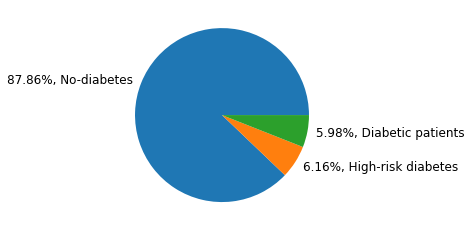

In [129]:
#df["Diabetes"] = df["Diabetes"].astype('int').astype('category')
y = df[["Diabetes"]].value_counts()
l = ["87.86%, No-diabetes", "6.16%, High-risk diabetes", "5.98%, Diabetic patients"]
#y =np.array([8622, ])
plt.pie(y, labels = l)



In [21]:
df.describe()

,Gender,Years_in_US,Family_income,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Diabetes
count,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000,9813.000000
mean,1.509426,1.672271,2.246973,28.528248,21.004545,62.455233,1.868949,0.182921
std,0.499937,8.446506,1.635495,7.753571,4.261142,22.228196,0.337473,0.522102
min,1.000000,0.000000,0.000000,10.400000,10.100000,8.000000,1.000000,0.000000
25%,1.000000,0.000000,0.870000,23.200000,18.500000,50.300000,2.000000,0.000000
50%,2.000000,0.000000,1.700000,29.300000,20.700000,60.300000,2.000000,0.000000
75%,2.000000,0.000000,3.600000,33.800000,22.900000,73.300000,2.000000,0.000000
max,2.000000,99.000000,5.000000,59.400000,40.100000,162.800000,2.000000,2.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             9813 non-null   int64  
 1   Years_in_US        9813 non-null   float64
 2   Family_income      9813 non-null   float64
 3   ArmCircum          9813 non-null   float64
 4   SaggitalAbdominal  9813 non-null   float64
 5   GripStrength       9813 non-null   float64
 6   Breast_fed         9813 non-null   float64
 7   Diabetes           9813 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 613.4 KB


# Slip Dataset

In [23]:
def split_train_test(data, test_ratio):
 shuffled_indices = np.random.permutation(len(data))
 test_set_size = int(len(data) * test_ratio)
 test_indices = shuffled_indices[:test_set_size]
 train_indices = shuffled_indices[test_set_size:]
 return data.iloc[train_indices], data.iloc[test_indices]


In [24]:
train_set, test_set = split_train_test(df, 0.2)

In [25]:
len(train_set)

7851

In [26]:
len(test_set)

1962

show = sns.pairplot(df, hue='Diabetes', size=1.5, diag_kind='kde')

show.set(xticklabels=[])

## Exploring anything Train Set further

In [27]:
# create a copy of the train set

diabetes = train_set.copy()

<AxesSubplot:>

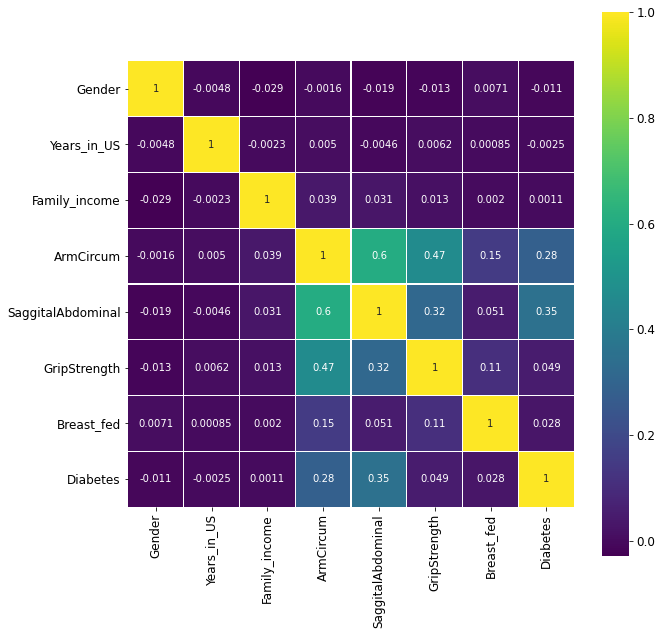

In [28]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
sns.heatmap(diabetes.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


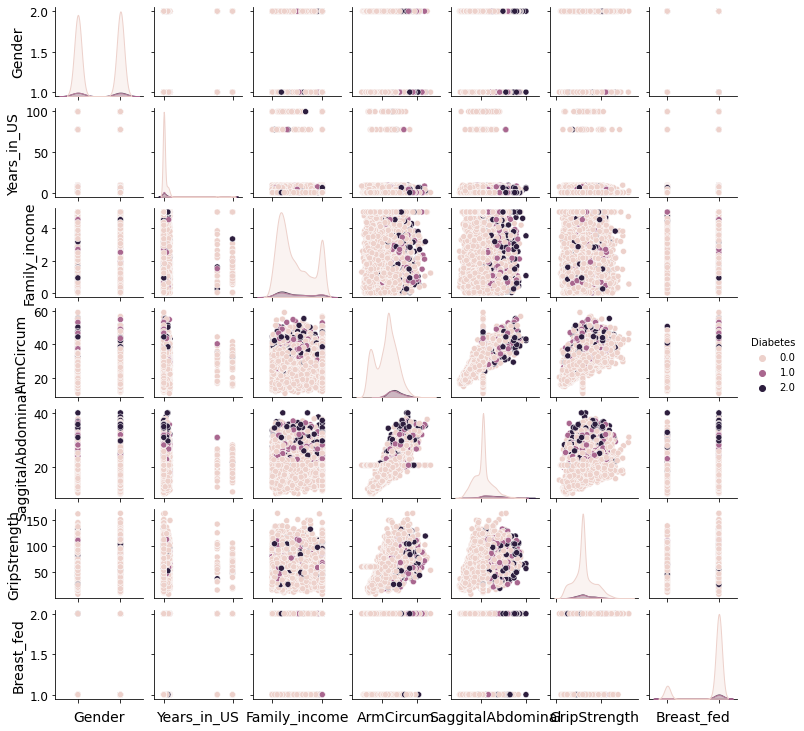

In [29]:
show = sns.pairplot(diabetes, hue='Diabetes', size=1.5, diag_kind='kde')

show.set(xticklabels=[])

# Separate labels from predictors in train set and test set

In [30]:
# Predictors
train_X = train_set.drop("Diabetes", axis=1)
test_X = test_set.drop("Diabetes", axis=1)

# Target values (labels)
train_Y = train_set["Diabetes"].copy()
test_Y = test_set["Diabetes"].copy()


In [31]:
train_Y.astype("category")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\format.py:1405: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


4471    0.0
6073    0.0
4001    0.0
1194    0.0
8543    0.0
       ... 
5734    0.0
5191    0.0
5390    0.0
860     0.0
7270    0.0
Name: Diabetes, Length: 7851, dtype: category
Categories (3, float64): [0.0, 1.0, 2.0]

In [32]:
train_Y.value_counts()

0.0    6898
2.0     493
1.0     460
Name: Diabetes, dtype: int64

# Train Model

## Train Linear Model

In [33]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_X, train_Y)

LinearRegression()

## Train SVM Regressor

**LinearSRV**

In [34]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(train_X, train_Y)

LinearSVR(epsilon=1.5, random_state=42)

**Second degree Polynomial Kernel**

In [35]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(train_X, train_Y)

SVR(C=100, degree=2, kernel='poly')

**Third degree Polynomial Kernel**

In [36]:
from sklearn.svm import SVR

svm3_poly_reg = SVR(kernel="poly", degree=3, C=100, epsilon=0.1, gamma="scale")
svm3_poly_reg.fit(train_X, train_Y)

SVR(C=100, kernel='poly')

**Tenth degree Polynomial Kernel**

from sklearn.svm import SVR

svm10_poly_reg = SVR(kernel="poly", degree=10, C=100, epsilon=0.1, gamma="scale")
svm10_poly_reg.fit(train_X, train_Y)

## Train Decision Tree Regressor

In [37]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

# train
tree_reg.fit(train_X, train_Y)

DecisionTreeRegressor()

# Train Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(train_X, train_Y)

RandomForestRegressor(random_state=42)

## Train Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict


forest_clf = RandomForestClassifier(random_state=42)

y_probas_forest = cross_val_predict(forest_clf, 
                                    train_X, 
                                    train_Y, 
                                    cv=3,
                                    method="predict_proba")


# Model Evaluation

## Linear Model

In [40]:
from sklearn.metrics import mean_squared_error

pred_y = lin_reg.predict(train_X)

mse = mean_squared_error(train_Y, pred_y)
rmse = np.sqrt(mse)

print("Lin_MSE =", mse)
print("Lin_RMSE =", rmse)

Lin_MSE = 0.23642923816054034
Lin_RMSE = 0.48623989774651394


## SVM

**LinearSVR**

In [41]:
pred_y = svm_reg.predict(train_X)

mse = mean_squared_error(train_Y, pred_y)
rmse = np.sqrt(mse)

print("SVR_MSE =", mse)
print("SVR_RMSE =", rmse)

SVR_MSE = 0.5714542968049461
SVR_RMSE = 0.7559459615640168


**Second Degree Polynomial Kernel**

In [42]:
pred_y = svm_poly_reg.predict(train_X)

mse = mean_squared_error(train_Y, pred_y)
rmse = np.sqrt(mse)

print("SVM_poly_MSE =", mse)
print("SVM_poly_RMSE =", rmse)

SVM_poly_MSE = 0.28286680620292487
SVM_poly_RMSE = 0.5318522409494246


**Third Degree Polynomial Kernel**

In [43]:
pred_y = svm3_poly_reg.predict(train_X)

mse = mean_squared_error(train_Y, pred_y)
rmse = np.sqrt(mse)

print("SVM_poly_MSE =", mse)
print("SVM_poly_RMSE =", rmse)

SVM_poly_MSE = 0.28238725918693336
SVM_poly_RMSE = 0.531401222417613


## Decision Tree

In [44]:
from sklearn.metrics import accuracy_score
pred_y = tree_reg.predict(train_X)

mse = mean_squared_error(train_Y, pred_y)
rmse = np.sqrt(mse)

print("tree_MSE =", mse)
print("tree_RMSE =", rmse)

tree_MSE = 0.0010826646287097185
tree_RMSE = 0.03290386950967498


## Random Forest Regressor

In [45]:
pred_y = forest_reg.predict(train_X)

mse = mean_squared_error(train_Y, pred_y)
rmse = np.sqrt(mse)

print("forest_MSE =", mse)
print("forest_RMSE =", rmse)

forest_MSE = 0.03588729078053464
forest_RMSE = 0.1894394118987246


## Random forest classifier

In [46]:
from sklearn.metrics import roc_auc_score

# Compute scores
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
y_scores_forest

# RandomForestClassifier's ROC AUC Score
#roc_auc_score(train_Y, y_scores_forest, multi_class= "ovr")

array([0.  , 0.03, 0.  , ..., 0.  , 0.  , 0.  ])

In [47]:
from sklearn.model_selection import cross_val_score

cross_val_score(forest_clf, 
                train_X, 
                train_Y, 
                cv=3, 
                scoring="accuracy")

array([0.87619412, 0.87390141, 0.87160871])

**Confusion Matrix**

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

# Short lists - Decision Tree and Random Forest

# Scale Train and Test Data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_X)
X_test_scaled = scaler.transform(test_X)

In [49]:
# Scale Train Data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_X.astype(np.float64))

cross_val_score(forest_clf, 
                X_train_scaled, 
                train_Y, 
                cv=3, scoring="accuracy")

array([0.875812  , 0.87390141, 0.87199083])

## Decision Tree

pred_y = tree_reg.predict(X_train_scaled)

mse = mean_squared_error(train_Y, pred_y)
rmse = np.sqrt(mse)

print("tree_MSE =", mse)
print("tree_RMSE =", rmse)

## Random Forest

pred_y = forest_reg.predict(X_train_scaled)

mse = mean_squared_error(train_Y, pred_y)
rmse = np.sqrt(mse)

print("forest_MSE =", mse)
print("forest_RMSE =", rmse)

# NO SCALING - Scaling made the model worse

# Fine-Tune Model

**Decision Tree**

Use grid search with cross-validation (with the help of the GridSearchCVclass) to find good hyperparameter values for a DecisionTreeClassifier.Hint: try various values for max_leaf_nodes.

In [50]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(5, 500)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(train_X, train_Y)

Fitting 3 folds for each of 1485 candidates, totalling 4455 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                            15, 16, 17, 18, 19, 20, 21, 22, 23,
                                            24, 25, 26, 27, 28, 29, 30, 31, 32,
                                            33, 34, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [51]:
tree_best_para = grid_search_cv.best_estimator_
tree_best_para

DecisionTreeClassifier(max_leaf_nodes=13, random_state=42)

**Random Forest**

In [52]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(train_X, train_Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-0.31873083 -0.25803577 -0.24376807 -0.31727551 -0.26580688 -0.25054106
 -0.31690724 -0.27033226 -0.25426573         nan         nan         nan
 -0.32036893 -0.27233829 -0.32928428 -0.2774178  -0.34648151 -0.28517189]
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the train scores are non-finite: [-0.08022131 -0.04667699 -0.03747805 -0.08063676 -0.04741628 -0.03841632
 -0.08000518 -0.0480424  -0.03875311         nan         nan         nan
 -0.00098181 -0.00098181 -0.00098181 -0.00098181 -0.00098181 -0.00098181]
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [53]:
forest_best_para = grid_search.best_params_
forest_best_para

{'max_features': 2, 'n_estimators': 30}

In [54]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.5645625142473607 {'max_features': 2, 'n_estimators': 3}
0.5079722160007245 {'max_features': 2, 'n_estimators': 10}
0.493728738246942 {'max_features': 2, 'n_estimators': 30}
0.5632721447607366 {'max_features': 4, 'n_estimators': 3}
0.5155646227060852 {'max_features': 4, 'n_estimators': 10}
0.5005407669730142 {'max_features': 4, 'n_estimators': 30}
0.5629451511071681 {'max_features': 6, 'n_estimators': 3}
0.5199348628845861 {'max_features': 6, 'n_estimators': 10}
0.504247687875446 {'max_features': 6, 'n_estimators': 30}
nan {'max_features': 8, 'n_estimators': 3}
nan {'max_features': 8, 'n_estimators': 10}
nan {'max_features': 8, 'n_estimators': 30}
0.566011421319627 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.5218604110663391 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.5738329728882241 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.5267046566081296 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
0.5886267970949265 {'bootstrap

**RF Classifier**

from sklearn.model_selection import GridSearchCV
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(train_X, train_Y)

# ACCURACY SCORE ON TEST SET - 89.94

## Decision Tree

In [56]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

y_pred = tree_best_para.predict(test_X)
accuracy = accuracy_score(test_Y, y_pred)

mse = mean_squared_error(test_Y, y_pred)
rmse = np.sqrt(mse)

print("tree_MSE =", mse)
print("tree_RMSE =", rmse)
print("tree_Accuracy_Score =", accuracy)

tree_MSE = 0.3053007135575943
tree_RMSE = 0.5525402370484834
tree_Accuracy_Score = 0.8751274209989807


**Confidence interval**

Lets compute a 95% confidence interval for the test RMSE:

## Random Forest Regressor

In [57]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.best_estimator_.predict(test_X)
# accuracy = accuracy_score(test_Y, y_pred)

#print("forest_Accuracy_Score =", accuracy)
mse = mean_squared_error(test_Y, y_pred)
rmse = np.sqrt(mse)

print("forest_MSE =", mse)
print("forest_RMSE =", rmse)
#print("forest_Accuracy_Score =", accuracy)

forest_MSE = 0.242300557308223
forest_RMSE = 0.4922403450634893


In [102]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    #print(errors)
    #print(test_labels/errors)
    
    
    return accuracy

# accuracy
best_grid= grid_search.best_estimator_
forest_accuracy = evaluate(best_grid, test_X, test_Y)

Model Performance
Average Error: 0.2707 degrees.
Accuracy = -inf%.


## Random Forest Classifier

In [101]:
from sklearn.model_selection import cross_val_score

cross_val_score(forest_clf, 
                train_X, 
                train_Y, 
                cv=3, 
                scoring="accuracy")

array([0.87619412, 0.87390141, 0.87160871])

You need to present your solution (highlighting what you have learned, what worked and what did not, what assumptions were made, and what your system’s limitations are), document everything, and create
nice presentations with clear visualizations and easy-to-remember statements (e.g., “the median income is the number one predictor of housing prices”). 

In this California housing example, the final performance of the system is not better than the experts’ price estimates, which were often off by about 20%, but it may still be a good idea to launch it, especially if this frees up some time for the experts so they can work on more interesting and productive tasks.

The F1 score favors classifiers that have similar precision and recall. This is not always what you want: in some contexts you mostly care about precision, and in other contexts you really care about recall.